This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [2]:
from __future__ import division
from plot_utils import *
import numpy as np
import os
import pylab
import seaborn

In [6]:
# Step 1 load data
nb_runs = 1
#model_full_names = ["Random Policy", "Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
model_full_names = ["Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
model_filenames = ["input_fmb","input_rmb","input_amb"]
#model_filenames = ["random","dist_fmb","dist_rmb","dist_amb"]

saves = {}
stats = {}
for k in model_filenames:
    saves[k] = []
    stats[k] = {}
    
for filename in model_filenames:
    for j in range(nb_runs):
        full_filename = "run_saves/"+filename+"_"+str(j)+"_bk.pickle"
        if os.path.isfile(full_filename):
            data = pickle.load(open(full_filename,"rb"))
            print 'final_eval_errors_bread_cart' in data
            saves[filename].append(data)

False
False
False


Flat Random Goal Babbling
hh
[1231.33999996 1231.33999996 1230.81091494 1217.26000004 1231.33999996
 1226.86000004 1231.33999996 1231.33999996 1231.33999996 1227.39298636]
hhh
Random Model Babbling
hh
[1231.33999996 1231.33999996 1231.33999996 1231.33999996 1217.26000004
 1217.59012313 1231.33999996 1231.33999996 1231.33999996 1231.33999996]
hhh
Active Model Babbling
hh
[1231.33999996 1231.33999996 1217.26000004 1217.26000004 1231.33999996
 1226.86000004 1231.33999996 1217.26000004 1231.33999996 1231.33999996]
hhh


Flat Random Goal Babbling
[293.69999998807907, 293.69999998807907, 293.5346609185217, 289.30000001192093, 293.69999998807907, 292.30000001192093, 293.69999998807907, 293.69999998807907, 293.69999998807907, 292.46655823718874]


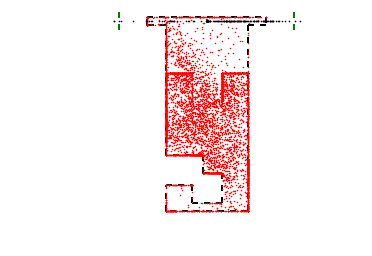

Random Model Babbling
[293.69999998807907, 293.69999998807907, 293.69999998807907, 293.69999998807907, 289.30000001192093, 289.4031634793834, 293.69999998807907, 293.69999998807907, 293.69999998807907, 293.69999998807907]


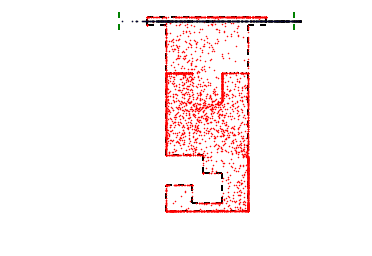

Active Model Babbling
[293.69999998807907, 293.69999998807907, 289.30000001192093, 289.30000001192093, 293.69999998807907, 292.30000001192093, 293.69999998807907, 289.30000001192093, 293.69999998807907, 293.69999998807907]


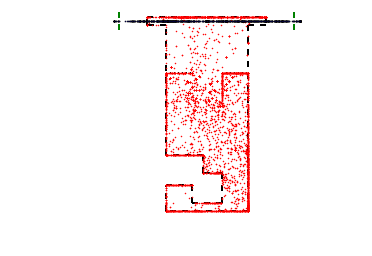

In [7]:
# Visualization of cart and agent final pos reached on 1 run
for m_name, m_id in zip(model_full_names,model_filenames):
    b_k = saves[m_id][0]
    print m_name
    #for i in range(nb_runs):
    #b_k = saves[m_id][i]
    print  b_k['final_agent_x_reached'][:10]
    plot_agent_pos_exploration(1, b_k['final_agent_x_reached'],
                                   b_k['final_agent_z_reached'],
                                   b_k['final_cart_x_reached'])
    if m_id == 'new_fmb':
        print 'zzz'
        #plt.savefig("cov_"+m_name+".pdf", bbox_inches='tight')
    plt.show()
    
    

In [8]:
nb_a_cells_x = 10
nb_a_cells_z = 30
nb_a_cells = nb_a_cells_x * nb_a_cells_z
nb_c_cells = 80
nb_b_cells = 32

# Grid cell visualization
for m_id in model_filenames:
    stats[m_id]['agent_cells'] = []
    stats[m_id]['cart_cells'] = []
    stats[m_id]['b_combinations'] = []
    stats[m_id]['first_breads'] = []
    stats[m_id]['first_swing_left'] = []
    stats[m_id]['first_swing_right'] = []
    stats[m_id]['first_cart_touched'] = []
    stats[m_id]['agent_error'] = []
    stats[m_id]['cart_error'] = []
    stats[m_id]['large_cart_error'] = []
    stats[m_id]['large_bread_error'] = []
    stats[m_id]['bread_error'] = []
    stats[m_id]['eval_cart_touched'] = []
    stats[m_id]['chosen_modules'] = []
def mean_std(data_name):
    mean = round(np.mean(stats[m_id][data_name]),3)
    std = round(np.std(stats[m_id][data_name]),3)
    return mean,std

for m_name, m_id in zip(model_full_names,model_filenames):
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explored_bins, c_explored_bins, b_explored_bins, first_swing_left, first_swing_right, first_breads_found,\
        first_cart_touched = get_grid_cell_exploration(b_k['final_agent_x_reached'],
                              b_k['final_agent_z_reached'],
                              b_k['final_cart_x_reached'],
                              b_k['final_bread_recovered'],
                              [b_k['bread_0'],b_k['bread_1'],b_k['bread_2'],b_k['bread_3'],b_k['bread_4']],
                              c_bins=nb_c_cells,a_bins_x=nb_a_cells_x, a_bins_z=nb_a_cells_z, info=False)
        stats[m_id]['agent_cells'].append((a_explored_bins/nb_a_cells)*100)
        stats[m_id]['cart_cells'].append((c_explored_bins/nb_c_cells)*100)
        stats[m_id]['b_combinations'].append((b_explored_bins/nb_b_cells)*100)
        stats[m_id]['first_breads'].append(first_breads_found) 
        stats[m_id]['first_swing_left'].append(first_swing_left) 
        stats[m_id]['first_swing_right'].append(first_swing_right)
        stats[m_id]['first_cart_touched'].append(first_cart_touched)
        
        plot_exploitation = False
        if b_k.has_key('final_eval_errors'):
            plot_exploitation = True
            a_err, c_err, b_err, cart_touched_eval = get_final_eval_error(b_k['final_eval_errors'],
                                                                          b_k['final_eval_cart_touched'],
                                                                          info=False)
            _, long_c_err, long_b_err = b_k['final_eval_errors_bread_cart']
            stats[m_id]['agent_error'].append(round(a_err,4))
            stats[m_id]['cart_error'].append(round(c_err,4))
            stats[m_id]['bread_error'].append(round(b_err,4))
            stats[m_id]['large_cart_error'].append(round(long_c_err,4))
            stats[m_id]['large_bread_error'].append(round(long_b_err,4))
            stats[m_id]['eval_cart_touched'].append(cart_touched_eval)
print '--- EXPLORATION ---'
exploration_metrics = ['agent_cells', 'cart_cells', 'b_combinations',
                       'first_cart_touched', 'first_swing_left', 'first_swing_right']

for m_name, m_id in zip(model_full_names,model_filenames):
    print "#################### " + m_name + " ##################"
    
    for i in range(nb_runs):
        
        b_k = saves[m_id][i]
        a = np.array(b_k['choosen_modules'])
        unique, counts = np.unique(a, return_counts=True)
        #print dict(zip(unique, counts))
    
    for metric in exploration_metrics:
        values = stats[m_id][metric]
        if not 'first' in metric:
            mean,std = mean_std(metric)
            print metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std)
        else:
            print metric + ':' + '%s' % (values)

    for i in range(6):
        first_found = []
        nb_found = []
        for j in range(nb_runs):
            first_found.append(stats[m_id]['first_breads'][j][i][0])
            nb_found.append(stats[m_id]['first_breads'][j][i][1])
        print 'bread %s:' % i
        print "first found: %s" % first_found
        print "nb_found: %s" % nb_found
    
if plot_exploitation:
    print '--- EXPLOITATION ---'
    exploitation_metrics = ['agent_error', 'cart_error', 'large_cart_error', 'bread_error', 'large_bread_error', 'eval_cart_touched']
    for m_name, m_id in zip(model_full_names,model_filenames):
        print "#################### " + m_name + " ##################"
        for metric in exploitation_metrics:
            values = stats[m_id][metric]
            mean,std = mean_std(metric)
            print metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std)    


--- EXPLORATION ---
#################### Flat Random Goal Babbling ##################
agent_cells:[28.000000000000004], MEAN: 28.0, STD: 0.0
cart_cells:[61.25000000000001], MEAN: 61.25, STD: 0.0
b_combinations:[62.5], MEAN: 62.5, STD: 0.0
first_cart_touched:[1727]
first_swing_left:[4672]
first_swing_right:[9163]
bread 0:
first found: [0]
nb_found: [3248]
bread 1:
first found: [46]
nb_found: [864]
bread 2:
first found: [31]
nb_found: [3667]
bread 3:
first found: [1018]
nb_found: [1818]
bread 4:
first found: [1314]
nb_found: [351]
bread 5:
first found: [2128]
nb_found: [52]
#################### Random Model Babbling ##################
agent_cells:[28.000000000000004], MEAN: 28.0, STD: 0.0
cart_cells:[76.25], MEAN: 76.25, STD: 0.0
b_combinations:[53.125], MEAN: 53.125, STD: 0.0
first_cart_touched:[1160]
first_swing_left:['never']
first_swing_right:[1160]
bread 0:
first found: [0]
nb_found: [3878]
bread 1:
first found: [64]
nb_found: [1577]
bread 2:
first found: [129]
nb_found: [3437]
brea

In [9]:
# Grid cell exploration curves
all_a_explo = np.zeros((4,nb_runs,101))
all_c_explo = np.zeros((4,nb_runs,101))
all_b_explo = np.zeros((4,nb_runs,101))
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    print m_name
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explo = [0.]
        c_explo = [0.]
        b_explo = [0.]
        for nb_episodes in np.arange(100,10100,100):
            
            a_explored_bins, c_explored_bins, b_explored_bins, _, _, _,_\
            = get_grid_cell_exploration(b_k['final_agent_x_reached'][:nb_episodes],
                                  b_k['final_agent_z_reached'][:nb_episodes],
                                  b_k['final_cart_x_reached'][:nb_episodes],
                                  b_k['final_bread_recovered'][:nb_episodes],
                                  [b_k['bread_0'][:nb_episodes],
                                   b_k['bread_1'][:nb_episodes],
                                   b_k['bread_2'][:nb_episodes],
                                   b_k['bread_3'][:nb_episodes],
                                   b_k['bread_4'][:nb_episodes]],
                                  c_bins=80,a_bins_x=nb_a_cells_x, a_bins_z=nb_a_cells_z, info=False)
            a_explo.append((a_explored_bins/nb_a_cells)*100)
            c_explo.append((c_explored_bins/nb_c_cells)*100)
            b_explo.append((b_explored_bins/nb_b_cells)*100)
        all_a_explo[m_nb,i,:] = a_explo
        all_c_explo[m_nb,i,:] = c_explo
        all_b_explo[m_nb,i,:] = b_explo
        
#print np.sum(all_a_explo,axis=1).shape
#print np.mean(np.sum(all_a_explo,axis=1),axis=0).shape
#break
colors = ['red','blue','green','magenta','black','cyan','orange']
mean_a_explo = np.mean(all_a_explo,axis=1)
mean_b_explo = np.mean(all_b_explo,axis=1)
mean_c_explo = np.mean(all_c_explo,axis=1)

std_a_explo = np.std(all_a_explo,axis=1)
std_b_explo = np.std(all_b_explo,axis=1)
std_c_explo = np.std(all_c_explo,axis=1)

Flat Random Goal Babbling
Random Model Babbling
Active Model Babbling


agent exploration
0.0
0.0
0.0
0.0


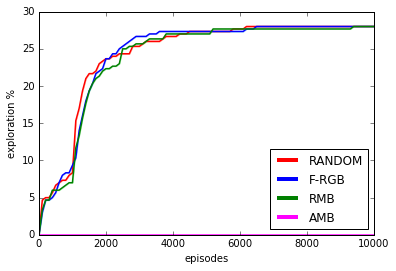

cart
0.0
0.0
0.0
0.0


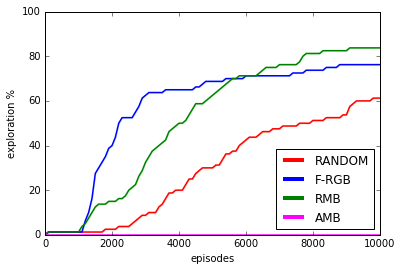

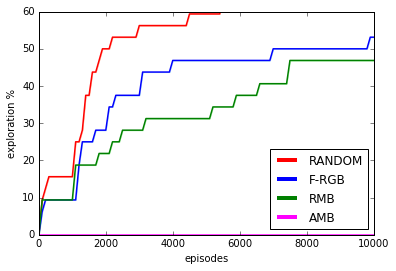

In [10]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['RANDOM','F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print "agent exploration"
x = np.arange(0,10100,100)
for i in range(4):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,30)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print "cart"
for i in range(4):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

#print "bread"
for i in range(4):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,60)
#plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

In [11]:
short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:
for i in range(nb_runs):
    ints = saves[model_filenames[3]][i]['interests']
    plot_interests(i, ints,legend=True,labels=short_labels)
    plt.savefig("d_legends_interests_"+str(i)+".pdf", bbox_inches='tight')


IndexError: list index out of range

In [ ]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

labels = ['agent final position','bread final count','cart final position',
               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print len(labels_2)
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 7:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4],
                    range(10),pylab.randn(10),colors[5],
                    range(10),pylab.randn(10),colors[6])
    
leg = figlegend.legend(lines, labels[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.pdf')

In [ ]:
print len()


